<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Laboratorios/Laboratorio_3/MINE_4206_202510_AML_Lab3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

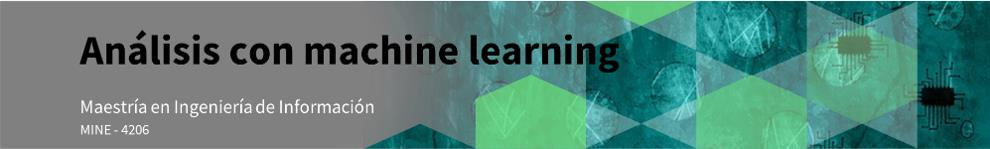

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=mvUzsZbk4y-4)<br>
[0. Instalación de librerías.](#scrollTo=gjQDyeHN5Lib)<br>
[1. Importar librerías](#scrollTo=KXlOoHGx6Fdz)<br>
[2. Introducción a los datos.](#scrollTo=6OKhZATq6Jlt)<br>
[3. Modelamiento.](#scrollTo=fy59XxXphe_L)<br>
[4. Preguntas.](#scrollTo=npdolSB5h7np)<br>

---
# Contexto y objetivos.

La comunidad científica es de la comunidad más activa que existe a la hora de realizar publicaciones en grandes revistas. Los avances tecnológicos, las facilidades a la hora de encontrar información y la gran cantidad de médicos dedicados a realizar estudios y publicarlos ha aumentado a tal punto que realizar una categorización de estos textos sería ideal para poder filtrar la información y acceder a ella de una manera más rápida y precisa.

Para eso, le han disponibilizado los *Abstracts* de diferentes artículos de los cuales los expoertos los han clasificado en diferentes categorias, y la idea es poder automatizar este proceso para que futuros artículos puedan ser clasificados automáticamente sin necesidad de disponer del tiempo de los expertos.



**Objetivos:**

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.



# Entendimiento del negocio.

La organización ha compartido un archivo con la información clasificada de cada enfermedad, junto con los abstract de los artículos relacionados.

Así mismo, la organización ha confirmado mediante sus expertos las siguientes clases:

* **1:** Neoplasms.
* **2:** Digestive System Diseases.
* **3:** Nervous System Diseases.
* **4:** Cardiovascular Diseases.
* **5:** General Pathological Conditions.

---
# 0. Instalación de librerías.

Análisis profundo de datos:

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=afc711173c3d92590426bfc70a46ac875445ada31ca1565ab1395beec876902c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


---
# 1. Importar librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

#Librerías de Keras y Tensor Flow
import keras
import tensorflow as tf
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import plot_model

#Nltk
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Otras librerías
from wordcloud import WordCloud, STOPWORDS
import unicodedata, re
import inflect

print(f"La versión de sklearn es: {sklearn.__version__}")
print('Tensorflow version:', tf.__version__)

La versión de sklearn es: 1.6.1
Tensorflow version: 2.18.0


In [ ]:
nltk.download('all')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [ ]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19
#En el entorno de Keras definimos la semilla también
keras.utils.set_random_seed(my_seed)

In [ ]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202510_AML/refs/heads/main/Laboratorios/Laboratorio_3/Datos/abstracts.dat'
data_df = pd.read_csv(url, sep="\t",header=None)
data_df.head() #Veremos las primeras líneas del dataset, para ver si leyó correctamente

,0,1
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14438 entries, 0 to 14437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14438 non-null  int64 
 1   1       14438 non-null  object
dtypes: int64(1), object(1)
memory usage: 225.7+ KB


In [ ]:
data_df.columns

Index([0, 1], dtype='int64')

Los dataframe de pandas pueden confundirse con nombres de tipo numérico, por esta razón vamos a renombrar las columnas:

In [ ]:
data_df.columns = ['type', 'abstract']
data_df.columns

Index(['type', 'abstract'], dtype='object')

Generamos una lista ordenada con los valores determinados por la organización, para cada una de las clases:

In [ ]:
class_labels = ['Neoplasms', 'Digestive System Diseases', 'Nervous System Diseases',
                'Cardiovascular Diseases', 'General Pathological Conditions']
class_labels

['Neoplasms',
 'Digestive System Diseases',
 'Nervous System Diseases',
 'Cardiovascular Diseases',
 'General Pathological Conditions']

In [ ]:
classes_count = len(class_labels)
classes_count

5

## 2.2. Separación de la información.

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [ ]:
train, test = train_test_split(data_df, test_size=test_val_alpha, random_state=my_seed)
train.head()

,type,abstract
6877,5,Caseating hepatic granulomas in Hodgkin's lymp...
4532,5,Biochemical evaluation of calcium stone patien...
10355,5,Elevated soluble interleukin-2 receptor levels...
5524,5,Esophageal verrucous carcinoma: histologically...
2778,1,A case of classical mycosis fungoides associat...


In [ ]:
val, test = train_test_split(test, test_size=0.5, random_state=my_seed)

In [ ]:
print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de validación:", val.shape)
print("Tamaño de datos de prueba:", test.shape)

Tamaño de datos de entrenamiento: (11550, 2)
Tamaño de datos de validación: (1444, 2)
Tamaño de datos de prueba: (1444, 2)


Verificamos datos duplicados:

In [ ]:
train.duplicated().sum()

0

Generamos una copia del conjunto de entrenamiento como un respaldo:

In [ ]:
new_train = train.copy()
new_train

,type,abstract
6877,5,Caseating hepatic granulomas in Hodgkin's lymp...
4532,5,Biochemical evaluation of calcium stone patien...
10355,5,Elevated soluble interleukin-2 receptor levels...
5524,5,Esophageal verrucous carcinoma: histologically...
2778,1,A case of classical mycosis fungoides associat...
...,...,...
5032,1,Surgical management of pulmonary metastatic le...
1378,5,Effect of abrupt mitral regurgitation after ba...
757,1,Suggestive evidence that pelvic endometriosis ...
10862,4,Myocardial perfusion imaging with technetium-9...


## 2.3. Exploración de los datos.

Análisis profundo de la información:

In [ ]:
ProfileReport(new_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Generamos una función para graficar un wordcloud:

In [ ]:
def show_wordcloud(words, stopwords=[]):
  comment_words = ''

  # iterate through the csv file
  for val in words:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white', stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

Visualizamos el wordcloud sin retirar las stopwords:

---------- Words for class: 1 ----------


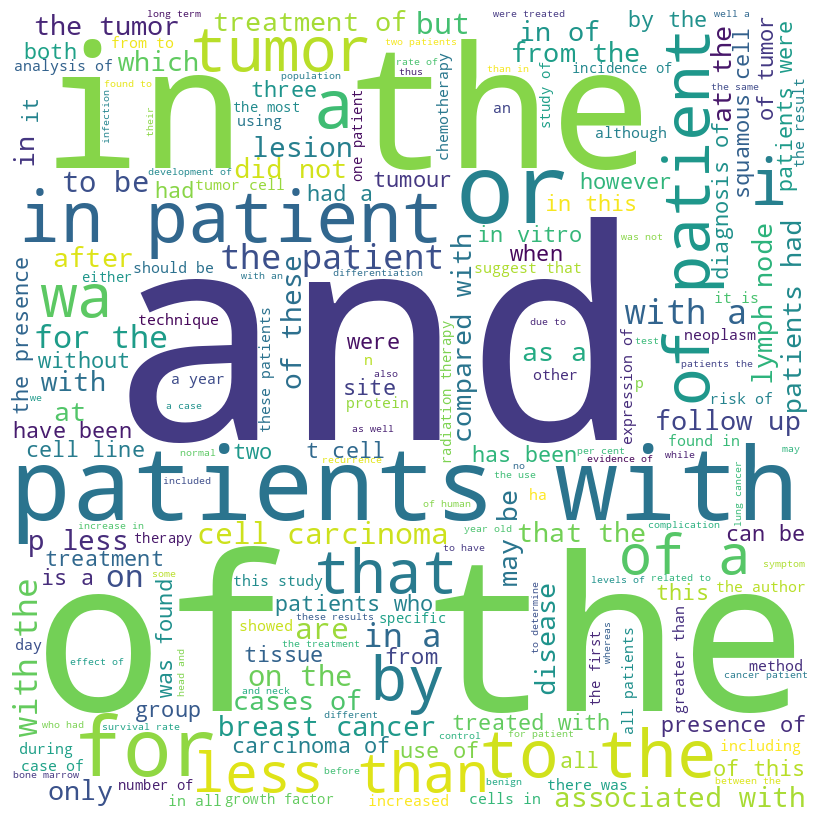

---------- Words for class: 2 ----------


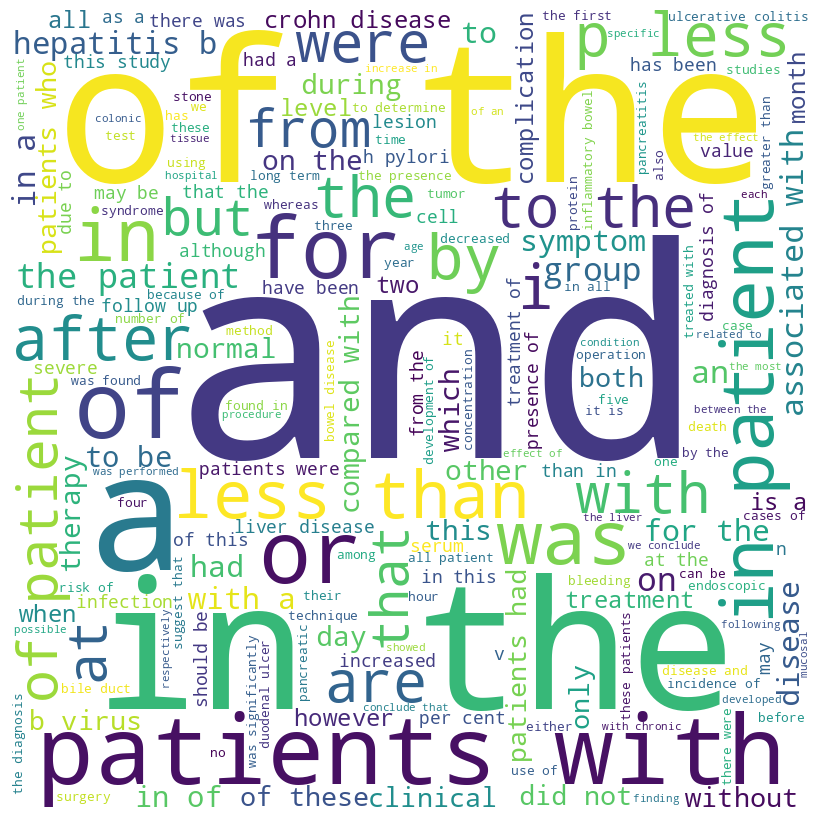

---------- Words for class: 3 ----------


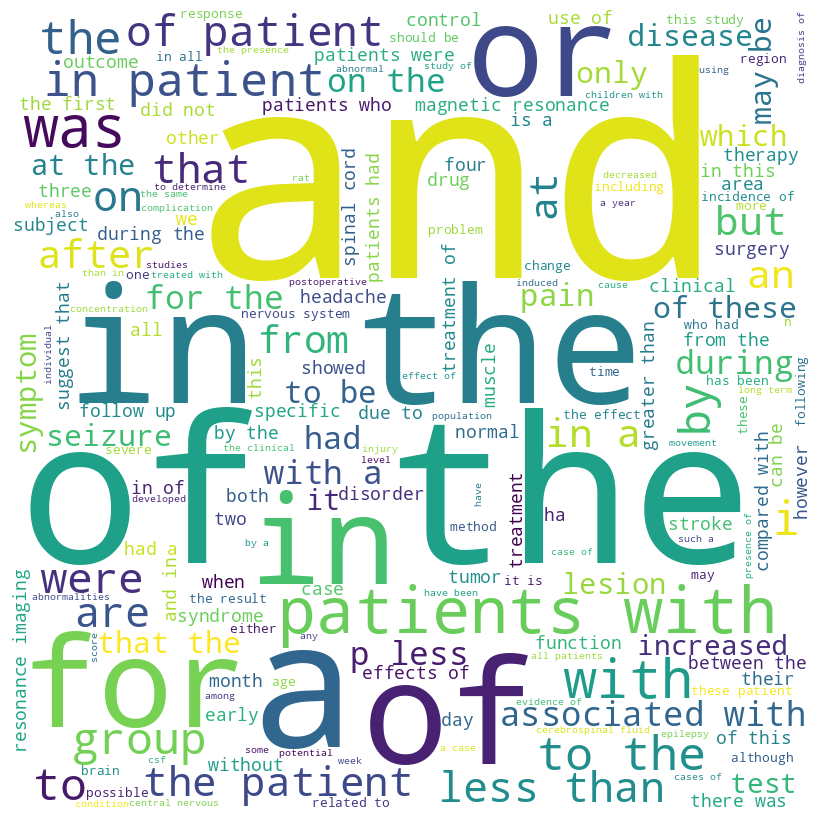

---------- Words for class: 4 ----------


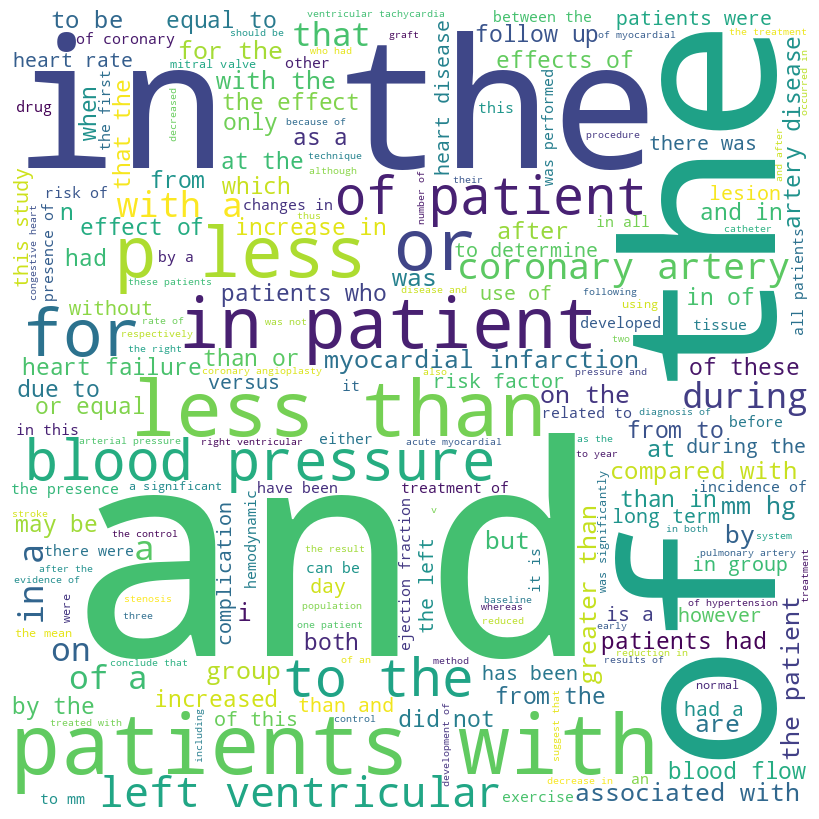

---------- Words for class: 5 ----------


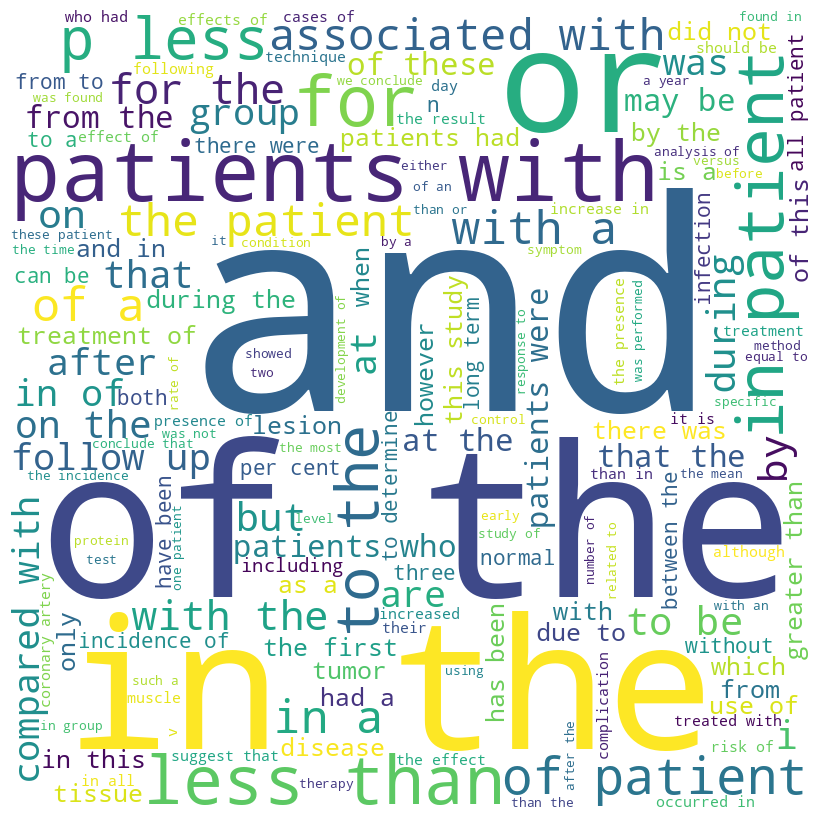

In [ ]:
for i in range(5):
  print(f'---------- Words for class: {i+1} ----------')
  show_wordcloud(new_train.loc[new_train['type']==(i+1), 'abstract'])

Ahora retirando las stopwords.

In [ ]:
for i in range(5):
  print(f'---------- Words for class: {i+1} ----------')
  show_wordcloud(new_train.loc[new_train['type']==(i+1), 'abstract'], stopwords=STOPWORDS)

Output hidden; open in https://colab.research.google.com to view.

¿Qué diferencia notas en los 2 casos?

## 2.4. Insights obtenidos de la información.

* No hay información duplicada en los artículos.
* No se presentan ausencias en los datos.

## 2.5. Preparación de la información.

Finalmente, vamos a separar la variable objetivo de los textos, que se convertirán en las variables descriptoras:

In [ ]:
X_train, y_train = new_train['abstract'], new_train['type']
display(X_train)
y_train

,abstract
6877,Caseating hepatic granulomas in Hodgkin's lymp...
4532,Biochemical evaluation of calcium stone patien...
10355,Elevated soluble interleukin-2 receptor levels...
5524,Esophageal verrucous carcinoma: histologically...
2778,A case of classical mycosis fungoides associat...
...,...
5032,Surgical management of pulmonary metastatic le...
1378,Effect of abrupt mitral regurgitation after ba...
757,Suggestive evidence that pelvic endometriosis ...
10862,Myocardial perfusion imaging with technetium-9...


,type
6877,5
4532,5
10355,5
5524,5
2778,1
...,...
5032,1
1378,5
757,1
10862,4


In [ ]:
X_val, y_val = val['abstract'], val['type']
display(X_val)
y_val

,abstract
297,Long-term function of persons with atheroscler...
8066,Technique of photodynamic therapy for dissemin...
4592,A kallikrein-like enzyme in blood vessels of o...
12286,Internal fixation of femoral neck fractures. T...
2000,Mandibular osteomyelitis in a patient with sic...
...,...
1897,An angiographic technique for three-dimensiona...
612,The role of indium-labelled leukocyte imaging ...
8471,Partial splenic embolization. An effective alt...
13218,Studies of myocardial protection in the immatu...


,type
297,4
8066,1
4592,4
12286,3
2000,3
...,...
1897,5
612,5
8471,5
13218,4


In [ ]:
X_test, y_test = test['abstract'], test['type']

Revisamos la distribución de enfermedades del conjunto de entrenamiento:

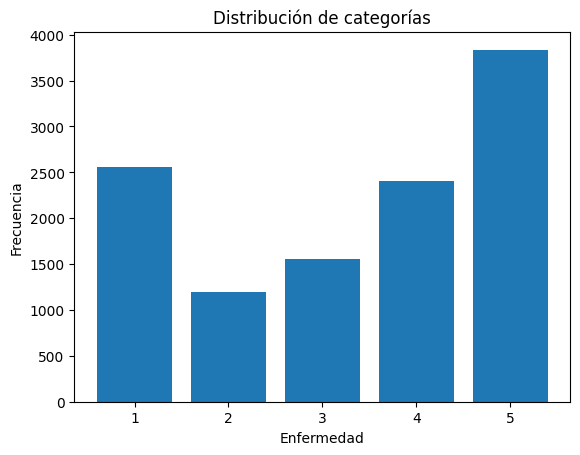

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Enfermedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de categorías')
plt.show()

---
# 3. Modelamiento.

##3.1. Preparación de los datos.

Vamos a reutilizar la función `text_preprocess()` para realizar todos los pasos del procesamiento de textos: tokenización, eliminación de palabras vacías y stemming:

In [ ]:
def text_preprocess(text):
  tokenizer = RegexpTokenizer(r'\w+')
  stemmer = PorterStemmer()

  tokens = tokenizer.tokenize(text)
  tokens = [word for word in tokens if word not in stopwords.words('english')]
  tokens = [stemmer.stem(word) for word in tokens]
  return ' '.join(tokens)

Adicionalmente, definiremos un objeto de la clase `CountVectorizer()` con el parámetro `preprocessor` para, de esa forma, tener un preprocesamiento y transformación de un texto a la representación de bolsa de palabras:

In [ ]:
vectorizer = CountVectorizer(preprocessor=text_preprocess)

Vamos a transformar nuestro conjunto de entrenamiento:

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train

<11550x25587 sparse matrix of type '<class 'numpy.int64'>'
	with 863009 stored elements in Compressed Sparse Row format>

Y utilizaremos `transform()` con el conjunto de validación:

In [ ]:
X_val = vectorizer.transform(X_val)
X_val

<1444x25587 sparse matrix of type '<class 'numpy.int64'>'
	with 106458 stored elements in Compressed Sparse Row format>

##3.2. Reducción de la dimensionalidad.

Utilizaremos la clase `TruncatedSVD()`, aplicando una descomposición en valores singulares sin centrar los datos. Además, seguiremos lo que nos sugiere la documentación y utilizaremos el número recomendado de componentes para análisis de textos (`n_components=100`):

In [ ]:
COMPONENTS = 100

In [ ]:
tsvd = TruncatedSVD(n_components=COMPONENTS)

Igualmente, utilizaremos la función `fit_transform()` con el conjunto de entrenamiento:

In [ ]:
X_train = tsvd.fit_transform(X_train)
X_train

array([[ 2.22717371, -0.2232904 ,  0.59561987, ...,  0.09367189,
        -0.28211242,  0.28734615],
       [ 7.50313936,  2.70080666,  1.16146648, ...,  1.16187965,
         1.37243846, -0.53163906],
       [ 6.60119511,  0.77097184,  1.17524377, ...,  0.15894917,
         0.03570378, -0.50708161],
       ...,
       [ 2.08419887, -1.42562302, -0.52612722, ...,  0.24691274,
         0.12884022, -0.09174122],
       [ 3.97025426, -2.72894509, -3.07820977, ...,  1.25900714,
        -1.51864519, -0.06762435],
       [ 7.05379034,  3.13145781,  1.5549814 , ..., -0.81907158,
        -0.0290685 , -0.41135043]])

Y aplicaremos la misma transformación sobre el conjunto de validación:

In [ ]:
X_val = tsvd.transform(X_val)
X_val

array([[ 3.41597203, -1.41337134, -1.60946179, ...,  0.29720187,
        -1.12208221,  0.08448634],
       [ 6.27854625,  2.35269289,  1.81842593, ..., -0.42101368,
         0.12082461, -0.15790938],
       [ 3.99885826, -4.0260273 , -5.07200603, ...,  1.18357021,
        -0.37661249, -1.41350943],
       ...,
       [ 9.70781354,  2.40524897,  0.79595606, ...,  0.39726351,
         0.23373286,  0.43977688],
       [ 2.65475303, -2.83383446, -2.59450429, ...,  0.13510219,
        -0.91645205, -2.65368064],
       [ 4.73327126, -3.96391425, -5.79760007, ...,  0.20545643,
         0.69801765, -0.53351048]])

Si utilizamos `X_train.shape`, veremos que cada ejemplo del conjunto de entrenamiento es ahora un vector de 100 posiciones:

In [ ]:
X_train.shape

(11550, 100)

##3.3. Transformación de la variable objetivo.

Como puedes observar, nuestra variable objetivo `y_train` tiene cinco clases:

In [ ]:
y_train.value_counts()

,count
type,
5,3836
1,2554
4,2405
3,1556
2,1199


Nuestra red neuronal va a tener `cinco` neuronas de salida, una para cada posible clase. Por lo tanto, utilizaremos la función `get_dummies()` para obtener la representación correspondiente de la variable objetivo:

In [ ]:
y_train = pd.get_dummies(y_train)
y_train

,1,2,3,4,5
6877,False,False,False,False,True
4532,False,False,False,False,True
10355,False,False,False,False,True
5524,False,False,False,False,True
2778,True,False,False,False,False
...,...,...,...,...,...
5032,True,False,False,False,False
1378,False,False,False,False,True
757,True,False,False,False,False
10862,False,False,False,True,False


Generamos la categorización con el conjunto de validación:

In [ ]:
y_val = pd.get_dummies(y_val)
y_val

,1,2,3,4,5
297,False,False,False,True,False
8066,True,False,False,False,False
4592,False,False,False,True,False
12286,False,False,True,False,False
2000,False,False,True,False,False
...,...,...,...,...,...
1897,False,False,False,False,True
612,False,False,False,False,True
8471,False,False,False,False,True
13218,False,False,False,True,False


## 3.4. Funciones de apoyo.

Función asociada para presentar el gráfico de la matriz de confusión:

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(4, 4)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## 3.5. Modelo base.

### 3.5.1. Arquitectura

Ahora nos enfocaremos en la construcción y entrenamiento de nuestra red neuronal.

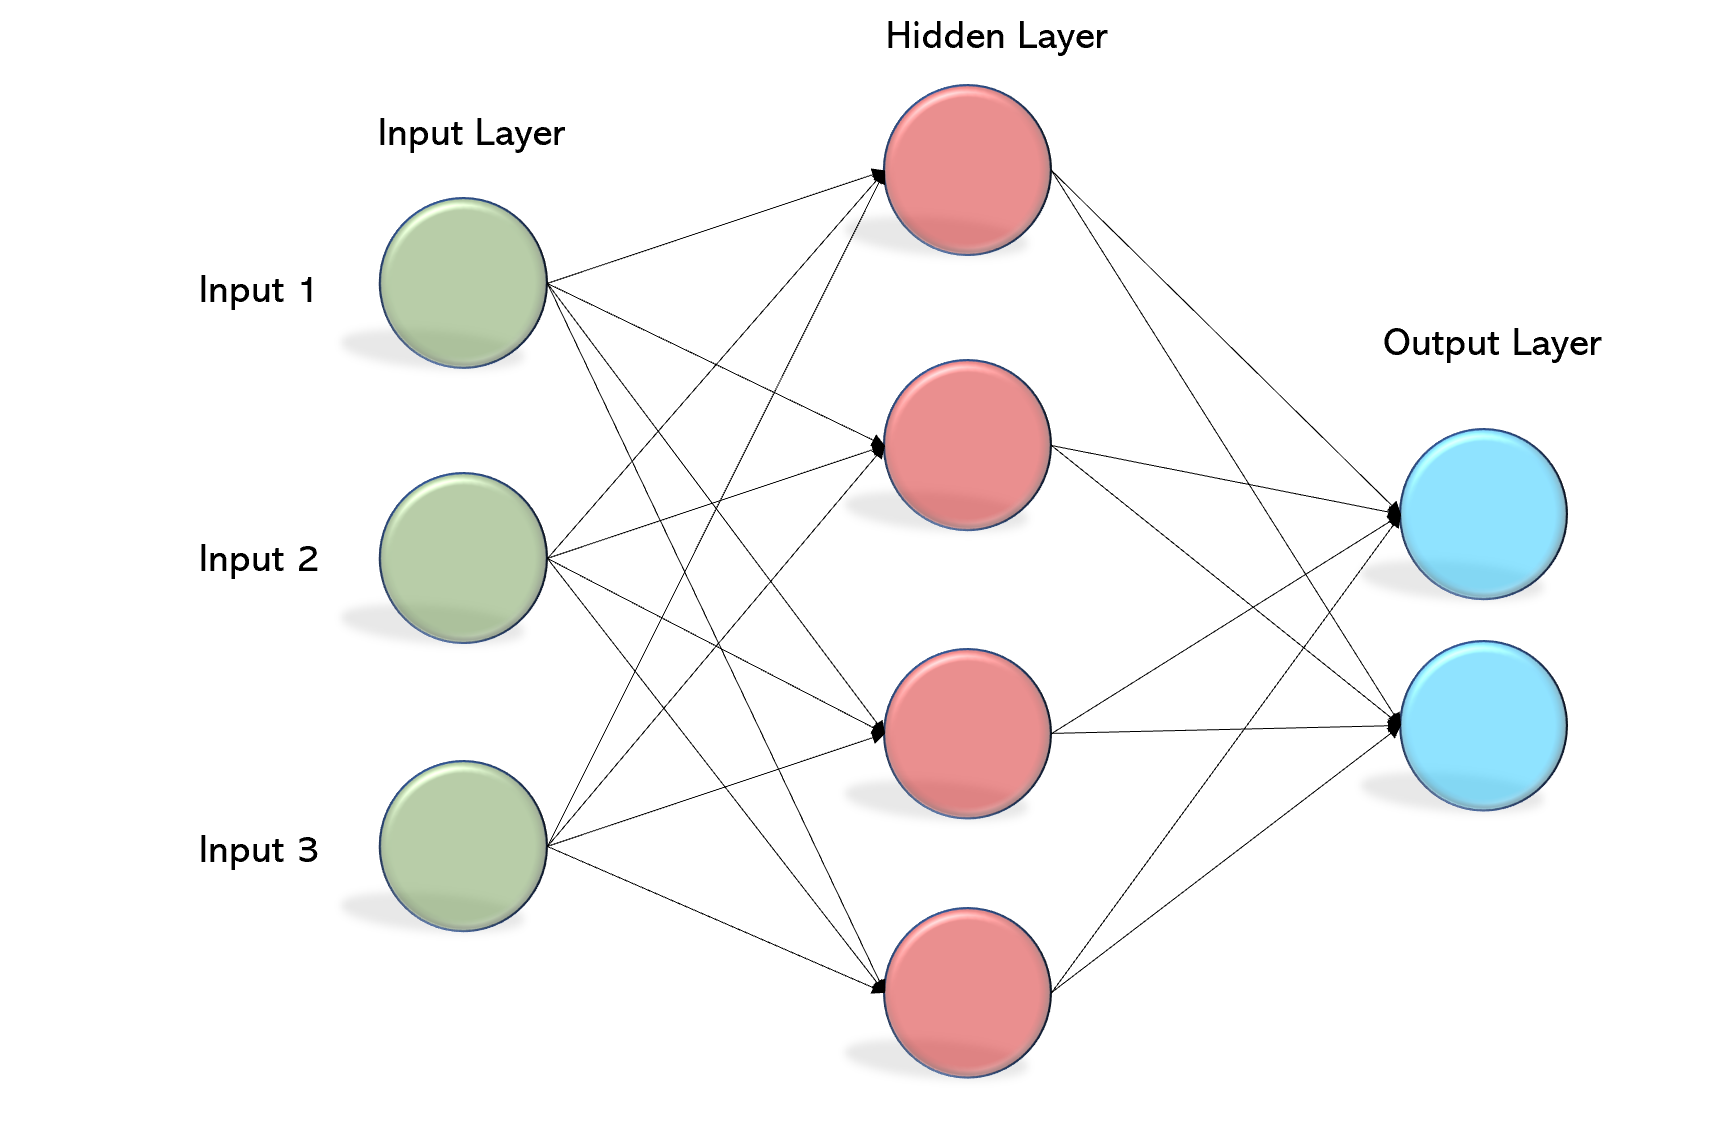

Elementos importantes para conformar la red neuronal:
* [`Sequential()`](https://keras.io/api/models/sequential/): clase para definir modelos basados en capas lineales.
* [`Dense()`](https://keras.io/api/layers/core_layers/dense/): clase para definir una capa de neuronas densamente conectadas.
* [`Input()`](https://keras.io/api/layers/core_layers/input/): función para definir un tensor de entrada para el modelo.

In [ ]:
mlp = Sequential()

Como modelo inicial, vamos a agregar una capa de entrada de 100 neuronas (igual a la dimensión de nuestro conjunto procesado), una capa oculta de 25 neuronas (utilizando una activación ReLU), y una capa de salida con 5 neuronas (igual a la cantidad de clases de nuestro problema). Esta última tiene activación Softmax, que es una generalización de la función logística o sigmoide a varias dimensiones, y que retorna una distribución de probabilidad:

In [ ]:
INPUT_SHAPE = (COMPONENTS, )

In [ ]:
mlp.add(Input(shape=INPUT_SHAPE, name='Capa_Entrada'))
mlp.add(Dense(25, activation='relu', name='Capa_Oculta'))
mlp.add(Dense(classes_count, activation='softmax', name='Capa_Salida'))

Finalmente, utilizaremos el método `compile()` especificando la función de costo de Entropía cruzada, el optimizador ADAM, y la métrica de exactitud como criterio de evaluación durante el entrenamiento:

In [ ]:
mlp.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

Podemos utilizar el método `summary()` para ver un resumen de nuestro modelo, junto con el número de parámetros a entrenar:

In [ ]:
mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta (Dense)                  │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 5)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,655 (10.37 KB)

 Trainable params: 2,655 (10.37 KB)

 Non-trainable params: 0 (0.00 B)

Una manera más amigable de verlo...

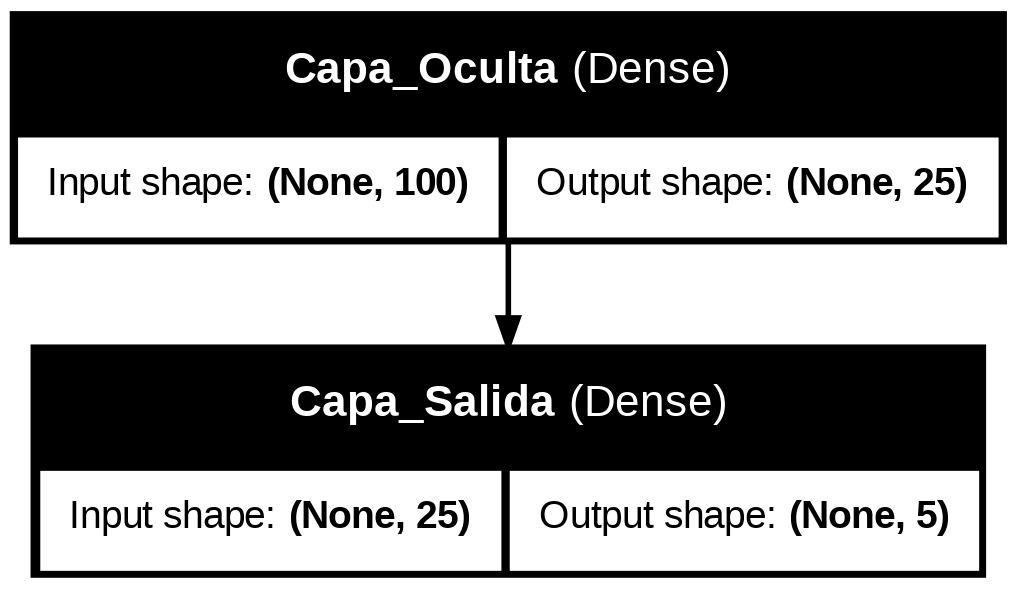

In [ ]:
plot_model(mlp, show_shapes=True, show_layer_names=True)

### 3.5.2. Entrenamiento.

Vamos a enviar el conjunto de datos de entrenamiento, validación, número de épocas y tamaño del batch:

In [ ]:
history = mlp.fit(X_train,
                  y_train,
                  validation_data=(X_val, y_val),
                  batch_size=10,
                  epochs=15)

Epoch 1/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3863 - loss: 1.5145 - val_accuracy: 0.5609 - val_loss: 1.1100
Epoch 2/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5717 - loss: 1.0789 - val_accuracy: 0.5706 - val_loss: 1.0618
Epoch 3/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5800 - loss: 1.0193 - val_accuracy: 0.5720 - val_loss: 1.0449
Epoch 4/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5909 - loss: 0.9880 - val_accuracy: 0.5665 - val_loss: 1.0362
Epoch 5/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5987 - loss: 0.9654 - val_accuracy: 0.5686 - val_loss: 1.0317
Epoch 6/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6041 - loss: 0.9471 - val_accuracy: 0.5713 - val_loss: 1.0288
Epoch 7/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6121 - loss: 0.9326 - val_accuracy: 0.5658 - val_loss: 1.0277
Epoch 8/15
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6150 - loss: 0.9211 - 

Veamos en un gráfico el comportamiento de la pérdida en el entrenamiento:

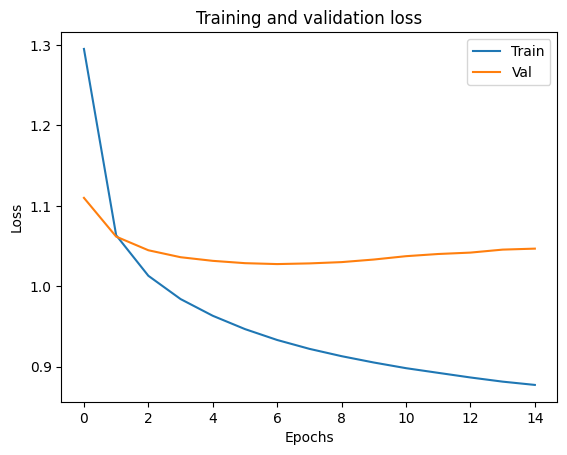

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Y la métrica?

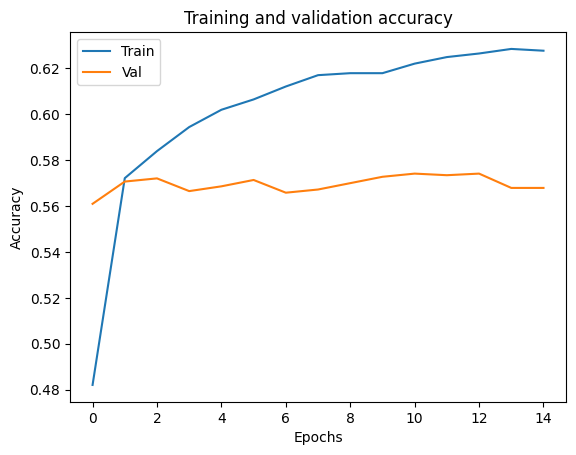

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 3.5.3. Evaluación.

Para realizar una evaluación sobre el conjunto de pruebas, vamos a realizar el procesamiento de textos y reducción de la dimensionalidad con los objetos `vectorizer` y `tsvd`:

In [ ]:
X_test = vectorizer.transform(X_test)
X_test = tsvd.transform(X_test)
X_test

array([[ 4.09041473e+00, -1.78958581e-02,  2.81220728e+00, ...,
         3.48336975e-01,  5.41547209e-02,  1.87945575e-01],
       [ 2.21275962e+00, -3.36024891e+00, -3.00723942e-01, ...,
         3.85085597e-01, -1.04191308e+00, -1.24064351e+00],
       [ 1.76906119e+00, -4.23609805e+00,  2.47075907e+00, ...,
         2.06791036e-01,  3.40279927e-01,  1.71348575e-01],
       ...,
       [ 1.12016321e+00, -7.86501156e-01, -4.13315834e-03, ...,
         1.98032293e-01,  3.57113287e-01, -2.12269829e-01],
       [ 6.92236788e+00,  1.68715109e+00,  9.60096383e-01, ...,
        -2.86643407e-01,  6.57070206e-01,  8.91717838e-01],
       [ 2.55743930e+00,  1.24850224e-01,  6.61804898e-01, ...,
         2.41392202e-01,  9.17192239e-03,  1.46040130e-01]])

Categorizamos el valor de Y:

In [ ]:
y_test = pd.get_dummies(y_test)
y_test

,1,2,3,4,5
4506,True,False,False,False,False
6299,False,True,False,False,False
1810,True,False,False,False,False
2549,False,False,False,True,False
2580,False,False,False,False,True
...,...,...,...,...,...
11246,False,False,False,True,False
10662,False,False,False,False,True
7401,True,False,False,False,False
2986,False,False,False,True,False


Generamos las predicciones:

In [ ]:
y_pred = mlp.predict(X_test)
y_pred

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[6.5459770e-01, 4.6742562e-02, 7.8542657e-02, 9.7426791e-03,
        2.1037436e-01],
       [5.6277193e-02, 7.8455937e-01, 1.9688665e-05, 7.2495900e-03,
        1.5189397e-01],
       [6.5742737e-01, 8.8113090e-03, 1.2350247e-01, 2.4930744e-03,
        2.0776577e-01],
       ...,
       [4.2644563e-01, 1.0534870e-02, 2.6078647e-01, 9.6679583e-02,
        2.0555344e-01],
       [4.4120580e-02, 2.9370594e-01, 7.6244008e-03, 4.4249132e-01,
        2.1205777e-01],
       [1.1961267e-01, 1.5929577e-01, 2.7466103e-01, 5.3312201e-02,
        3.9311829e-01]], dtype=float32)

Demos un vistazo a las longitudes de cada uno de los conjuntos, para poder generar los reportes:

In [ ]:
print(y_test.shape)
print(y_pred.shape)
print(len(class_labels))

(1444, 5)
(1444, 5)
5


Para poder visualizar los resultados, debemos realizar unas transformaciones para obtener los valores de las etiquetas en cada caso:

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_labels

array([0, 1, 0, ..., 0, 3, 2])

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([0, 1, 0, ..., 0, 3, 4])

In [ ]:
print(classification_report(y_test_labels, y_pred_labels,
                            target_names=class_labels)
)

                                 precision    recall  f1-score   support

                      Neoplasms       0.67      0.74      0.70       305
      Digestive System Diseases       0.41      0.29      0.34       147
        Nervous System Diseases       0.56      0.37      0.44       188
        Cardiovascular Diseases       0.64      0.69      0.66       312
General Pathological Conditions       0.48      0.52      0.50       492

                       accuracy                           0.56      1444
                      macro avg       0.55      0.52      0.53      1444
                   weighted avg       0.56      0.56      0.55      1444



Para obtener la matriz de confusión utilizaremos las funciones `to_numpy()` y `argmax()` sobre `y_test`, obteniendo la misma forma que `y_pred`:

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

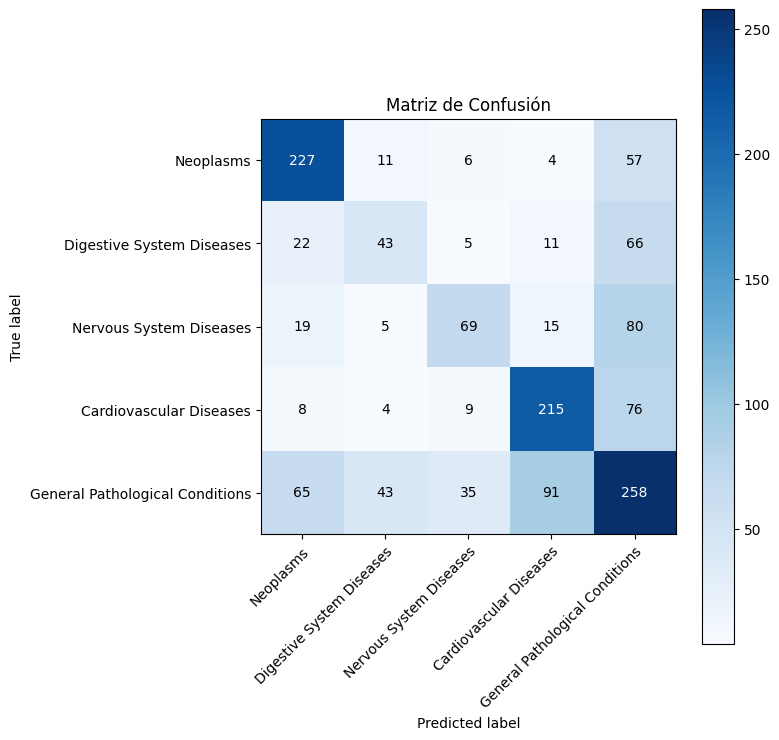

In [ ]:
plot_confusion_matrix(y_true=y_test_labels, y_pred=y_pred_labels, classes=class_labels,
                      title='Matriz de Confusión', size=(8, 8))

Igualmente, utilizaremos las mismas funciones para obtener el reporte de clasificación, especificando el parámetro `target_names` con el nombre original de las clases:

En términos generales, el modelo tiene una exactitud del 67% y, específicamente, la clase `Neoplasms` presenta el f1-score más alto. Sin embargo, la clase ` Digestive System Diseases` presenta el recall más bajo, lo que nos dice que el modelo tiene problemas para identificarla.

## 3.6. Búsqueda de hiperparámetros.

Ahora veremos si podemos obtener un mejor resultado realizando una búsqueda de hiperparámetros.

#### 3.6.1. Implementación.

In [ ]:
def build_mlp(hp):
  mlp = Sequential()
  # Especificamos el espacio de búsqueda para el número de neuronas por capa
  neurons = hp.Choice('neurons', [10, 25, 50])
  # Igualmente, especificamos el espacio de búsqueda para el número de capas ocultas
  layers = hp.Choice('layers', [1, 3, 5])

  mlp.add(Input(shape=INPUT_SHAPE, name='Capa_Entrada'))
  for i in range(layers):
    mlp.add(Dense(neurons,activation='relu',name=f'Capa_Oculta_{i+1}'))
  mlp.add(Dense(classes_count,activation='softmax',name='Capa_Salida'))

  mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  mlp.summary()
  return mlp

A continuación inicializaremos un objeto de la clase `RandomSearch()`, especificando la función de construcción del modelo, la métrica objetivo (en este caso la exactitud en el conjunto de validación), la semilla y la cantidad de entrenamientos aleatorios que se van a realizar:

In [ ]:
tuner = kt.RandomSearch(
    build_mlp,
    objective="val_accuracy",
    seed=my_seed,
    max_trials=5
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)                │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,065 (4.16 KB)

 Trainable params: 1,065 (4.16 KB)

 Non-trainable params: 0 (0.00 B)

Finalmente, utilizaremos el método `search()` con los mismos parámetros que el método `fit()` que utilizamos anteriormente:

In [ ]:
tuner.search(X_train,
             y_train,
             validation_data=(X_val, y_val),
             batch_size=10,
             epochs=15
)

Trial 5 Complete [00h 01m 05s]
val_accuracy: 0.5914127230644226

Best val_accuracy So Far: 0.5934903025627136
Total elapsed time: 00h 05m 11s


Al terminar la búsqueda aleatoria, podemos obtener el mejor modelo haciendo uso del método `get_best_models()`:

In [ ]:
best_model = tuner.get_best_models()[0]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)                │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_2 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_3 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_4 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_5 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,505 (60.57 KB)

 Trainable params: 15,505 (60.57 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


En ese sentido, el mejor modelo tiene las siguientes características:

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)                │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_2 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_3 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_4 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_5 (Dense)                │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,505 (60.57 KB)

 Trainable params: 15,505 (60.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_model

<Sequential name=sequential, built=True>

#### 3.6.2. Evaluación.

Realizaremos el mismo procesamiento, convirtiendo la salida del método `predict()` a un vector de una sola posición:

In [ ]:
y_pred = best_model.predict(X_test)
y_pred

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[5.8422840e-01, 4.3324407e-02, 5.8312040e-02, 5.6195479e-02,
        2.5793973e-01],
       [6.9036350e-02, 6.9468474e-01, 6.1849883e-04, 5.3279735e-03,
        2.3033221e-01],
       [5.8451259e-01, 6.2917089e-03, 7.5768836e-02, 4.9909973e-03,
        3.2843593e-01],
       ...,
       [6.1538404e-01, 7.6813340e-02, 6.5965116e-02, 9.5297433e-02,
        1.4654006e-01],
       [1.1285015e-01, 2.2410770e-01, 1.9203914e-02, 3.3573809e-01,
        3.0810025e-01],
       [4.4184707e-02, 3.5888277e-02, 4.0906882e-01, 4.2090070e-02,
        4.6876815e-01]], dtype=float32)

In [ ]:
print(y_test.shape)
print(y_pred.shape)
print(len(class_labels))

(1444, 5)
(1444, 5)
5


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_labels

array([0, 1, 0, ..., 0, 3, 2])

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([0, 1, 0, ..., 0, 3, 4])

La matriz de confusión:

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

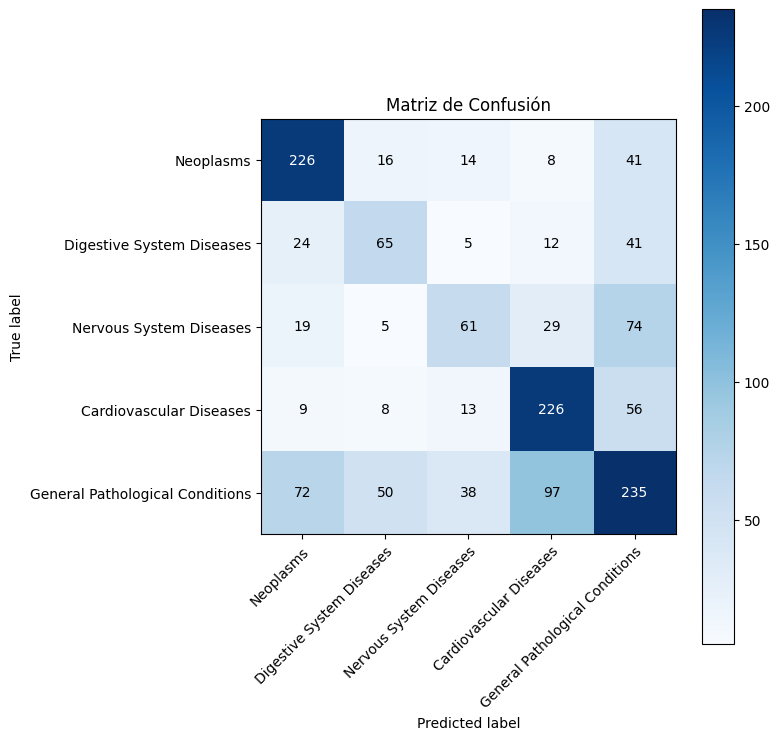

In [ ]:
plot_confusion_matrix(y_true=y_test_labels, y_pred=y_pred_labels, classes=class_labels,
                      title='Matriz de Confusión', size=(8, 8))

Obtendremos el reporte de clasificación:

In [ ]:
print(classification_report(y_test_labels, y_pred_labels,
                            target_names=class_labels)
)

                                 precision    recall  f1-score   support

                      Neoplasms       0.65      0.74      0.69       305
      Digestive System Diseases       0.45      0.44      0.45       147
        Nervous System Diseases       0.47      0.32      0.38       188
        Cardiovascular Diseases       0.61      0.72      0.66       312
General Pathological Conditions       0.53      0.48      0.50       492

                       accuracy                           0.56      1444
                      macro avg       0.54      0.54      0.54      1444
                   weighted avg       0.55      0.56      0.55      1444



Con el mejor modelo logramos llegar al 65% de exactitud, y pudimos aumentar considerablemente el f1-score para la clase `Neoplasms`. La arquitectura de perceptrón multicapa ofrece múltiples hiperparámetros, por lo que es posible realizar una búsqueda más profunda para llegar a un mejor resultado.

---
# 4. Preguntas

* ¿Consideras que existen otras alternativas para el procesamiento de la información?.
* Consideras que podrías experimentar buscar otros hiperparámetros, ¿cuáles?.
* Intenta modificar la función `build_mlp()` agregando otros hiperparámetros o modificando el espacio de búsqueda. ¿Qué combinación de hiperparámetros retorna el mejor desempeño para este problema?
* En este problema también utilizamos una representación de bolsa de palabras. ¿Otras representaciones vectoriales podrían mejorar el desempeño del clasificador?